## Polytope On-Demand Extremes-DT example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [5]:
%%capture cap
%run ../desp-authentication.py

Exception: Invalid username or password.

This will generate a token that can then be used by earthkit and polytope.

In [6]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

In [7]:
import earthkit.data
import earthkit.plots
from polytope.api import Client

## Data request

As for the global Extremes-DT output data is requested using the MARS language. The big difference here is that we have a new domain for every run which is done through the `georef` key, see below.

In [8]:
client = Client(
    address="polytope.lumi.apps.dte.destination-earth.eu")

request = {
    'class': 'd1',
    'dataset': 'on-demand-extremes-dt',
    'expver': '0099',
    'stream': 'oper',
    'date': '20250616',
    'time': 0,
    'type': 'fc',
    'levtype': 'sfc',
    'georef': 'u4usq2',
    'step': 12,
    'param': 167
}

file = client.retrieve("destination-earth", request, "data/on-demands-extreme-dt-example.grib") 

# data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)

2025-07-20 12:40:14 - INFO - Key read from /Users/maes/.polytopeapirc
2025-07-20 12:40:14 - INFO - Sending request...
{'request': 'class: d1\n'
            'dataset: on-demand-extremes-dt\n'
            "date: '20250616'\n"
            'expver: 0099\n'
            'georef: u4usq2\n'
            'levtype: sfc\n'
            'param: 167\n'
            'step: 12\n'
            'stream: oper\n'
            'time: 0\n'
            'type: fc\n',
 'verb': 'retrieve'}
2025-07-20 12:40:14 - INFO - Polytope user key found in session cache for user maes
2025-07-20 12:40:15 - INFO - Request accepted. Please poll ./df444346-6708-42c6-b2f9-d76036c01029 for status
2025-07-20 12:40:15 - INFO - Polytope user key found in session cache for user maes
2025-07-20 12:40:15 - INFO - Checking request status (df444346-6708-42c6-b2f9-d76036c01029)...
2025-07-20 12:40:16 - INFO - The current status of the request is 'queued'
2025-07-20 12:40:16 - INFO - The current status of the request is 'processing'
2025-07-2

In [9]:
data = earthkit.data.from_source("file", "data/on-demands-extreme-dt-example.grib") 

## Data inspection

We can list the data using the `ls` method. Here we see e.g. that we run the model in the `lambert_lam` projection.

In [10]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20250616,0,12,fc,None,lambert_lam


## Plotting

Finally we create plot of the data retrieved using earthkit-plots.

ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


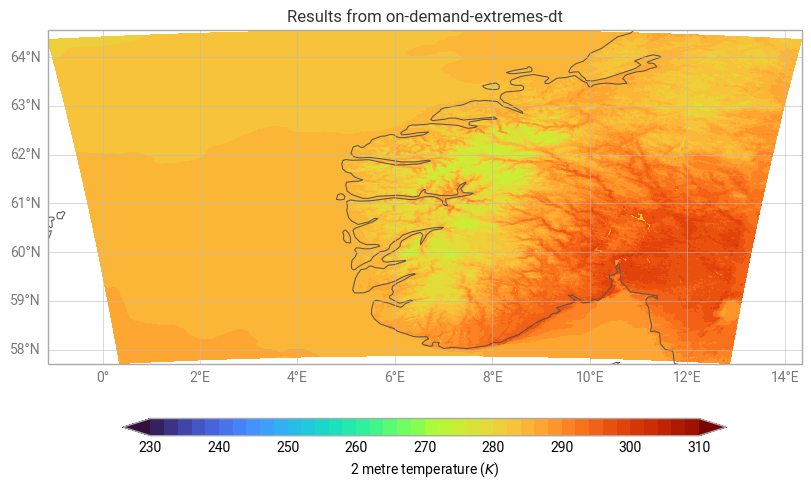

In [11]:
chart = earthkit.plots.Map()
chart.quickplot(data)
chart.title(f"Results from on-demand-extremes-dt")
chart.coastlines()
chart.gridlines()
chart.legend()
chart.show()